In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular

Carichiamo i dati 

In [10]:
data = load_breast_cancer()
X, y = data['data'], data['target']

print(X)
print(y)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Print per vedere se maligno o benigno

In [11]:

print(data['target_names'])

['malignant' 'benign']


Usiamo un tree classifier come primo approccio ma cosi non avremmo bisogno di lime in realta

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
print(tree_clf.score(X_test, y_test))

0.9035087719298246


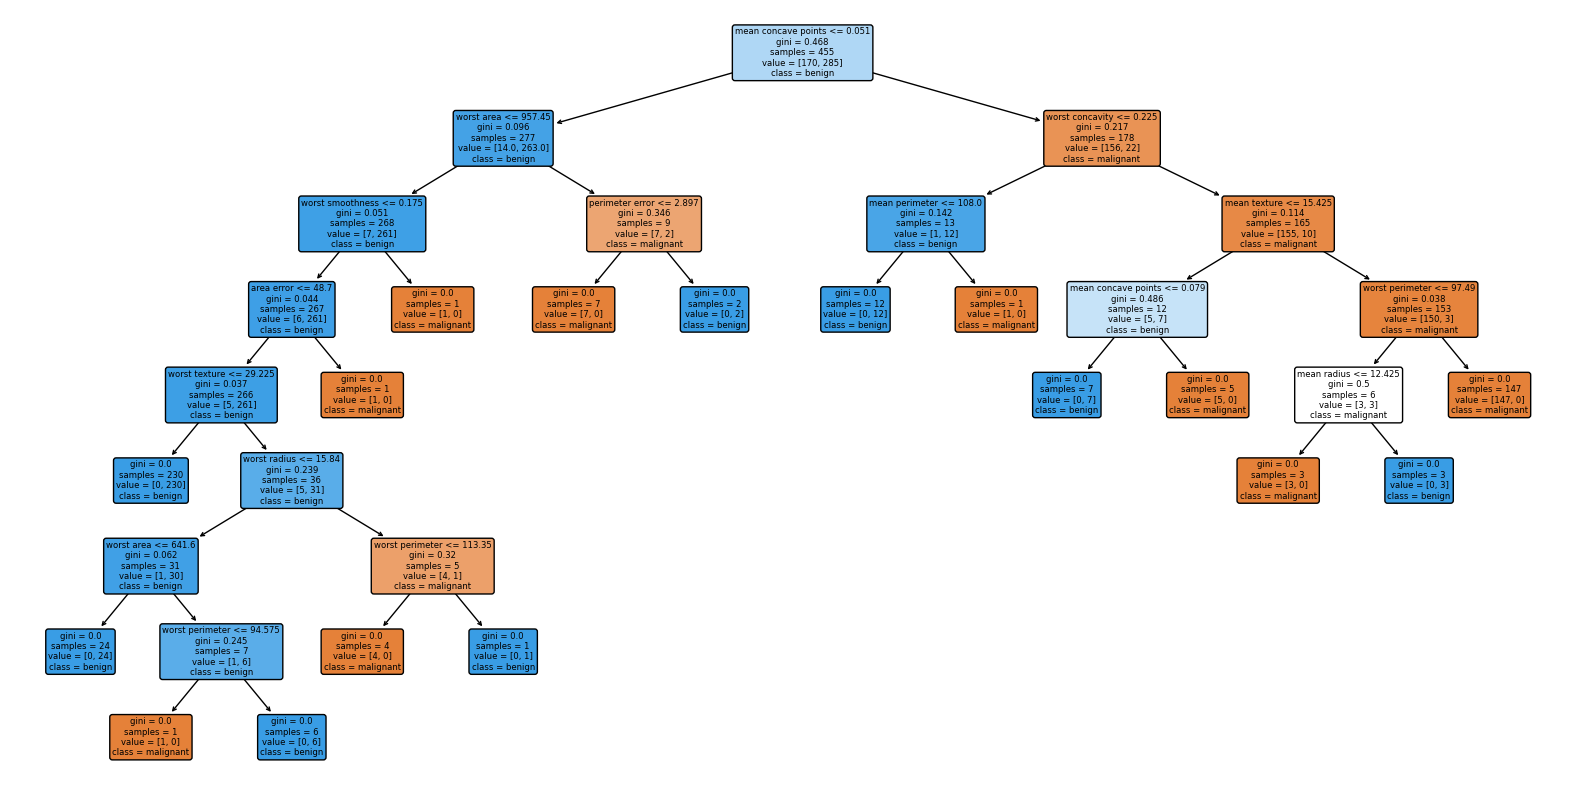

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=data['feature_names'], class_names=data['target_names'],rounded=True)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
print('accuracy forest classifier:', forest_clf.score(X_test, y_test))

accuracy forest classifier: 0.956140350877193


Qua vediamo l'importanza che viene data alle varie feature ma non sappiamo perchè

In [21]:
print(dict(zip(data['feature_names'], forest_clf.feature_importances_)))

{'mean radius': 0.03351243086958108, 'mean texture': 0.01782931743944431, 'mean perimeter': 0.05126274838862986, 'mean area': 0.03415182111035601, 'mean smoothness': 0.0061582062954421484, 'mean compactness': 0.005447656432185751, 'mean concavity': 0.06731625547505499, 'mean concave points': 0.09103208693751497, 'mean symmetry': 0.0027812786336005434, 'mean fractal dimension': 0.0034193224241864085, 'radius error': 0.022176350810865053, 'texture error': 0.0038783590542560828, 'perimeter error': 0.008272437587977436, 'area error': 0.03514846536693062, 'smoothness error': 0.0030500771123386835, 'compactness error': 0.004893066360035218, 'concavity error': 0.005849695709134949, 'concave points error': 0.00624875433051951, 'symmetry error': 0.003774575957561478, 'fractal dimension error': 0.004852681675610215, 'worst radius': 0.09770278720290287, 'worst texture': 0.014261991434012748, 'worst perimeter': 0.18170510178718885, 'worst area': 0.06891171616552712, 'worst smoothness': 0.008412433

Ora usiamo lime per spiegare queste scelte che vengono fatte

Correct:  Benign
Classification:  [1]
{'mean radius': 10.18, 'mean texture': 17.53, 'mean perimeter': 65.12, 'mean area': 313.1, 'mean smoothness': 0.1061, 'mean compactness': 0.08502, 'mean concavity': 0.01768, 'mean concave points': 0.01915, 'mean symmetry': 0.191, 'mean fractal dimension': 0.06908, 'radius error': 0.2467, 'texture error': 1.217, 'perimeter error': 1.641, 'area error': 15.05, 'smoothness error': 0.007899, 'compactness error': 0.014, 'concavity error': 0.008534, 'concave points error': 0.007624, 'symmetry error': 0.02637, 'fractal dimension error': 0.003761, 'worst radius': 11.17, 'worst texture': 22.84, 'worst perimeter': 71.94, 'worst area': 375.6, 'worst smoothness': 0.1406, 'worst compactness': 0.144, 'worst concavity': 0.06572, 'worst concave points': 0.05575, 'worst symmetry': 0.3055, 'worst fractal dimension': 0.08797}


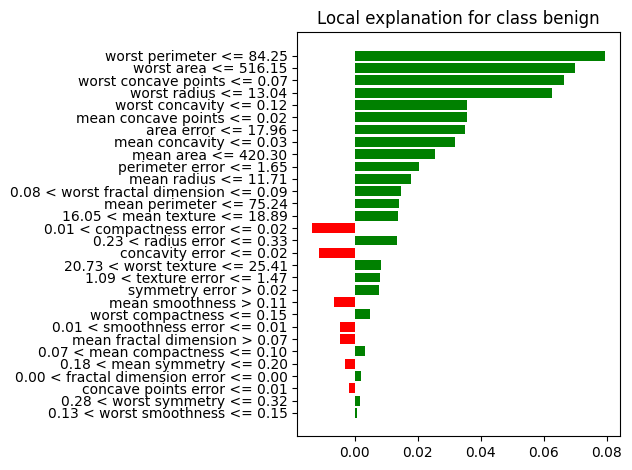

Correct:  Benign
Classification:  [1]
{'mean radius': 10.65, 'mean texture': 25.22, 'mean perimeter': 68.01, 'mean area': 347.0, 'mean smoothness': 0.09657, 'mean compactness': 0.07234, 'mean concavity': 0.02379, 'mean concave points': 0.01615, 'mean symmetry': 0.1897, 'mean fractal dimension': 0.06329, 'radius error': 0.2497, 'texture error': 1.493, 'perimeter error': 1.497, 'area error': 16.64, 'smoothness error': 0.007189, 'compactness error': 0.01035, 'concavity error': 0.01081, 'concave points error': 0.006245, 'symmetry error': 0.02158, 'fractal dimension error': 0.002619, 'worst radius': 12.25, 'worst texture': 35.19, 'worst perimeter': 77.98, 'worst area': 455.7, 'worst smoothness': 0.1499, 'worst compactness': 0.1398, 'worst concavity': 0.1125, 'worst concave points': 0.06136, 'worst symmetry': 0.3409, 'worst fractal dimension': 0.08147}


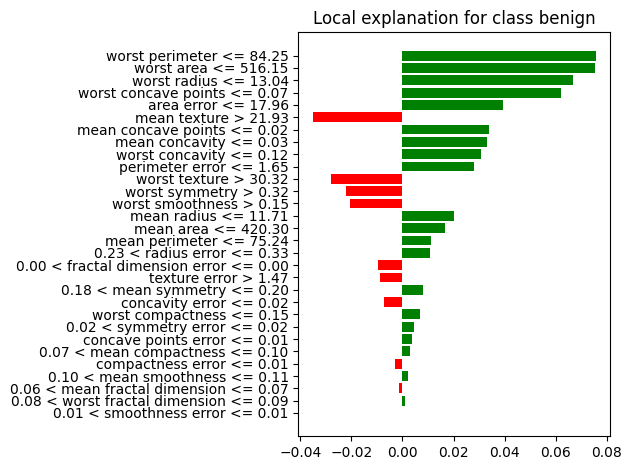

Correct:  Malignant
Classification:  [0]
{'mean radius': 19.45, 'mean texture': 19.33, 'mean perimeter': 126.5, 'mean area': 1169.0, 'mean smoothness': 0.1035, 'mean compactness': 0.1188, 'mean concavity': 0.1379, 'mean concave points': 0.08591, 'mean symmetry': 0.1776, 'mean fractal dimension': 0.05647, 'radius error': 0.5959, 'texture error': 0.6342, 'perimeter error': 3.797, 'area error': 71.0, 'smoothness error': 0.004649, 'compactness error': 0.018, 'concavity error': 0.02749, 'concave points error': 0.01267, 'symmetry error': 0.01365, 'fractal dimension error': 0.00255, 'worst radius': 25.7, 'worst texture': 24.57, 'worst perimeter': 163.1, 'worst area': 1972.0, 'worst smoothness': 0.1497, 'worst compactness': 0.3161, 'worst concavity': 0.4317, 'worst concave points': 0.1999, 'worst symmetry': 0.3379, 'worst fractal dimension': 0.0895}


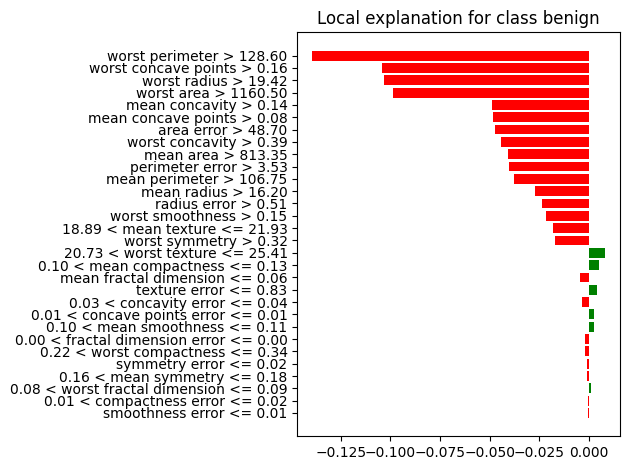

Correct:  Benign
Classification:  [1]
{'mean radius': 9.504, 'mean texture': 12.44, 'mean perimeter': 60.34, 'mean area': 273.9, 'mean smoothness': 0.1024, 'mean compactness': 0.06492, 'mean concavity': 0.02956, 'mean concave points': 0.02076, 'mean symmetry': 0.1815, 'mean fractal dimension': 0.06905, 'radius error': 0.2773, 'texture error': 0.9768, 'perimeter error': 1.909, 'area error': 15.7, 'smoothness error': 0.009606, 'compactness error': 0.01432, 'concavity error': 0.01985, 'concave points error': 0.01421, 'symmetry error': 0.02027, 'fractal dimension error': 0.002968, 'worst radius': 10.23, 'worst texture': 15.66, 'worst perimeter': 65.13, 'worst area': 314.9, 'worst smoothness': 0.1324, 'worst compactness': 0.1148, 'worst concavity': 0.08867, 'worst concave points': 0.06227, 'worst symmetry': 0.245, 'worst fractal dimension': 0.07773}


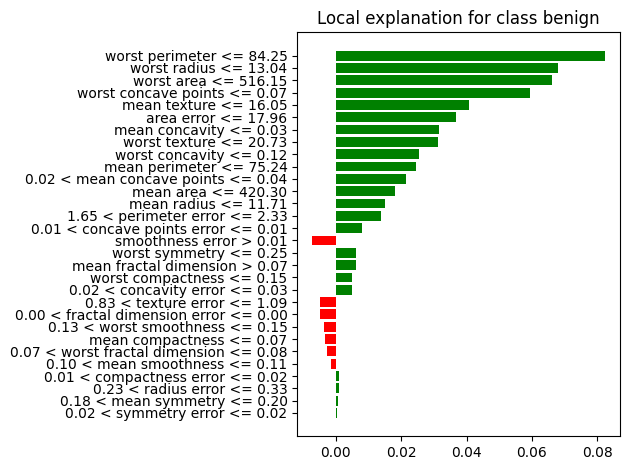

Correct:  Benign
Classification:  [1]
{'mean radius': 13.71, 'mean texture': 18.68, 'mean perimeter': 88.73, 'mean area': 571.0, 'mean smoothness': 0.09916, 'mean compactness': 0.107, 'mean concavity': 0.05385, 'mean concave points': 0.03783, 'mean symmetry': 0.1714, 'mean fractal dimension': 0.06843, 'radius error': 0.3191, 'texture error': 1.249, 'perimeter error': 2.284, 'area error': 26.45, 'smoothness error': 0.006739, 'compactness error': 0.02251, 'concavity error': 0.02086, 'concave points error': 0.01352, 'symmetry error': 0.0187, 'fractal dimension error': 0.003747, 'worst radius': 15.11, 'worst texture': 25.63, 'worst perimeter': 99.43, 'worst area': 701.9, 'worst smoothness': 0.1425, 'worst compactness': 0.2566, 'worst concavity': 0.1935, 'worst concave points': 0.1284, 'worst symmetry': 0.2849, 'worst fractal dimension': 0.09031}


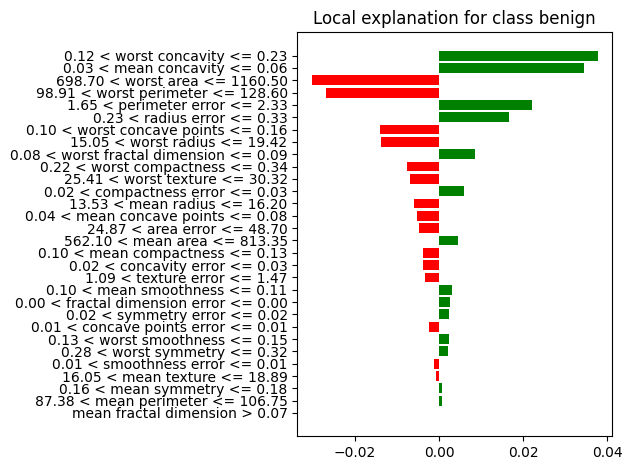

Correct:  Benign
Classification:  [1]
{'mean radius': 13.01, 'mean texture': 22.22, 'mean perimeter': 82.01, 'mean area': 526.4, 'mean smoothness': 0.06251, 'mean compactness': 0.01938, 'mean concavity': 0.001595, 'mean concave points': 0.001852, 'mean symmetry': 0.1395, 'mean fractal dimension': 0.05234, 'radius error': 0.1731, 'texture error': 1.142, 'perimeter error': 1.101, 'area error': 14.34, 'smoothness error': 0.003418, 'compactness error': 0.002252, 'concavity error': 0.001595, 'concave points error': 0.001852, 'symmetry error': 0.01613, 'fractal dimension error': 0.0009683, 'worst radius': 14.0, 'worst texture': 29.02, 'worst perimeter': 88.18, 'worst area': 608.8, 'worst smoothness': 0.08125, 'worst compactness': 0.03432, 'worst concavity': 0.007977, 'worst concave points': 0.009259, 'worst symmetry': 0.2295, 'worst fractal dimension': 0.05843}


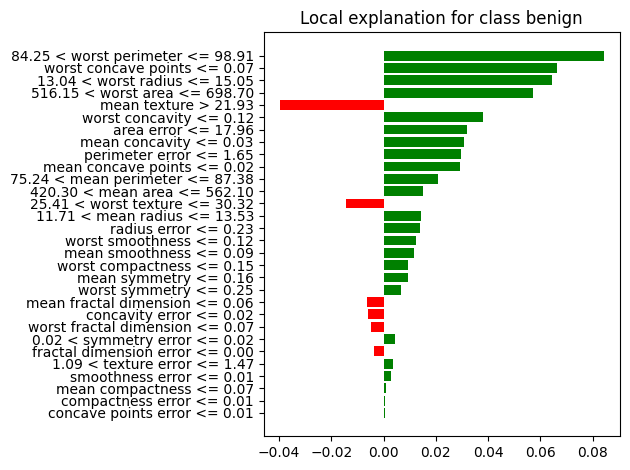

Correct:  Malignant
Classification:  [0]
{'mean radius': 14.45, 'mean texture': 20.22, 'mean perimeter': 94.49, 'mean area': 642.7, 'mean smoothness': 0.09872, 'mean compactness': 0.1206, 'mean concavity': 0.118, 'mean concave points': 0.0598, 'mean symmetry': 0.195, 'mean fractal dimension': 0.06466, 'radius error': 0.2092, 'texture error': 0.6509, 'perimeter error': 1.446, 'area error': 19.42, 'smoothness error': 0.004044, 'compactness error': 0.01597, 'concavity error': 0.02, 'concave points error': 0.007303, 'symmetry error': 0.01522, 'fractal dimension error': 0.001976, 'worst radius': 18.33, 'worst texture': 30.12, 'worst perimeter': 117.9, 'worst area': 1044.0, 'worst smoothness': 0.1552, 'worst compactness': 0.4056, 'worst concavity': 0.4967, 'worst concave points': 0.1838, 'worst symmetry': 0.4753, 'worst fractal dimension': 0.1013}


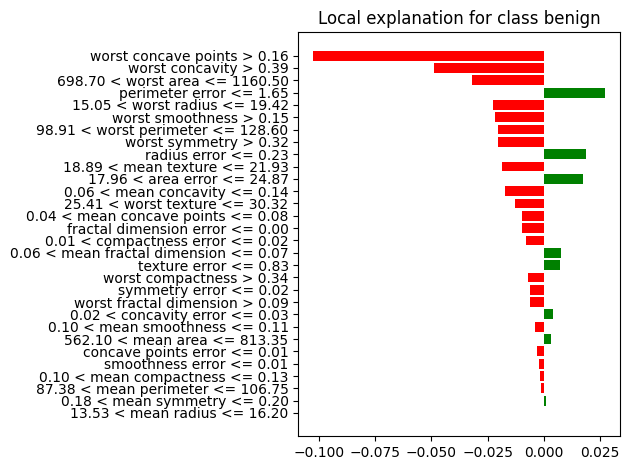

Correct:  Benign
Classification:  [1]
{'mean radius': 10.26, 'mean texture': 14.71, 'mean perimeter': 66.2, 'mean area': 321.6, 'mean smoothness': 0.09882, 'mean compactness': 0.09159, 'mean concavity': 0.03581, 'mean concave points': 0.02037, 'mean symmetry': 0.1633, 'mean fractal dimension': 0.07005, 'radius error': 0.338, 'texture error': 2.509, 'perimeter error': 2.394, 'area error': 19.33, 'smoothness error': 0.01736, 'compactness error': 0.04671, 'concavity error': 0.02611, 'concave points error': 0.01296, 'symmetry error': 0.03675, 'fractal dimension error': 0.006758, 'worst radius': 10.88, 'worst texture': 19.48, 'worst perimeter': 70.89, 'worst area': 357.1, 'worst smoothness': 0.136, 'worst compactness': 0.1636, 'worst concavity': 0.07162, 'worst concave points': 0.04074, 'worst symmetry': 0.2434, 'worst fractal dimension': 0.08488}


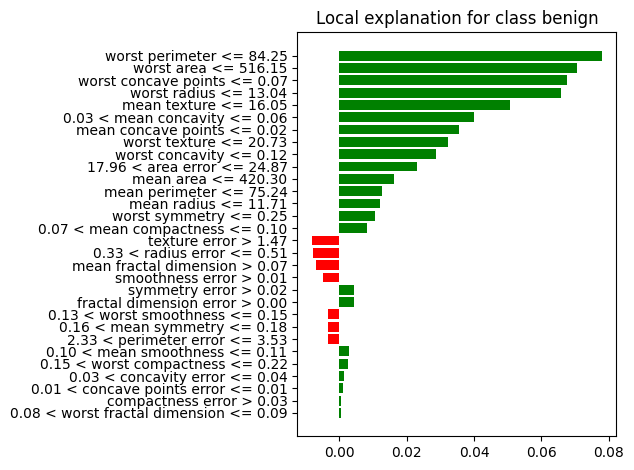

Correct:  Benign
Classification:  [1]
{'mean radius': 15.0, 'mean texture': 15.51, 'mean perimeter': 97.45, 'mean area': 684.5, 'mean smoothness': 0.08371, 'mean compactness': 0.1096, 'mean concavity': 0.06505, 'mean concave points': 0.0378, 'mean symmetry': 0.1881, 'mean fractal dimension': 0.05907, 'radius error': 0.2318, 'texture error': 0.4966, 'perimeter error': 2.276, 'area error': 19.88, 'smoothness error': 0.004119, 'compactness error': 0.03207, 'concavity error': 0.03644, 'concave points error': 0.01155, 'symmetry error': 0.01391, 'fractal dimension error': 0.003204, 'worst radius': 16.41, 'worst texture': 19.31, 'worst perimeter': 114.2, 'worst area': 808.2, 'worst smoothness': 0.1136, 'worst compactness': 0.3627, 'worst concavity': 0.3402, 'worst concave points': 0.1379, 'worst symmetry': 0.2954, 'worst fractal dimension': 0.08362}


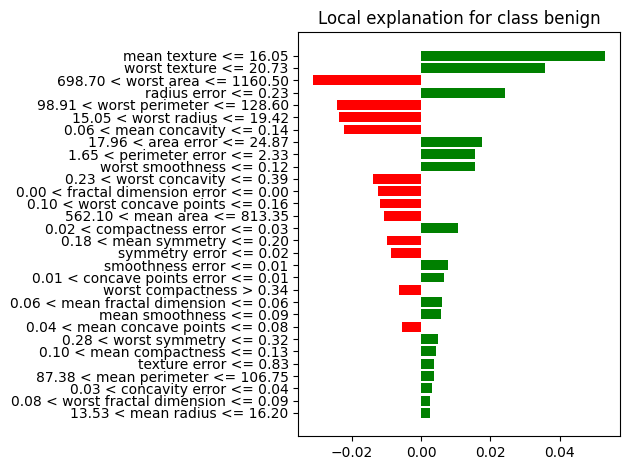

Correct:  Benign
Classification:  [1]
{'mean radius': 11.22, 'mean texture': 19.86, 'mean perimeter': 71.94, 'mean area': 387.3, 'mean smoothness': 0.1054, 'mean compactness': 0.06779, 'mean concavity': 0.005006, 'mean concave points': 0.007583, 'mean symmetry': 0.194, 'mean fractal dimension': 0.06028, 'radius error': 0.2976, 'texture error': 1.966, 'perimeter error': 1.959, 'area error': 19.62, 'smoothness error': 0.01289, 'compactness error': 0.01104, 'concavity error': 0.003297, 'concave points error': 0.004967, 'symmetry error': 0.04243, 'fractal dimension error': 0.001963, 'worst radius': 11.98, 'worst texture': 25.78, 'worst perimeter': 76.91, 'worst area': 436.1, 'worst smoothness': 0.1424, 'worst compactness': 0.09669, 'worst concavity': 0.01335, 'worst concave points': 0.02022, 'worst symmetry': 0.3292, 'worst fractal dimension': 0.06522}


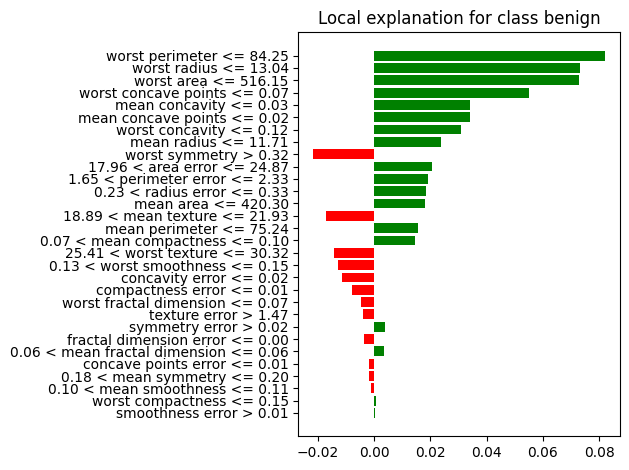

Correct:  Benign
Classification:  [1]
{'mean radius': 12.62, 'mean texture': 17.15, 'mean perimeter': 80.62, 'mean area': 492.9, 'mean smoothness': 0.08583, 'mean compactness': 0.0543, 'mean concavity': 0.02966, 'mean concave points': 0.02272, 'mean symmetry': 0.1799, 'mean fractal dimension': 0.05826, 'radius error': 0.1692, 'texture error': 0.6674, 'perimeter error': 1.116, 'area error': 13.32, 'smoothness error': 0.003888, 'compactness error': 0.008539, 'concavity error': 0.01256, 'concave points error': 0.006888, 'symmetry error': 0.01608, 'fractal dimension error': 0.001638, 'worst radius': 14.34, 'worst texture': 22.15, 'worst perimeter': 91.62, 'worst area': 633.5, 'worst smoothness': 0.1225, 'worst compactness': 0.1517, 'worst concavity': 0.1887, 'worst concave points': 0.09851, 'worst symmetry': 0.327, 'worst fractal dimension': 0.0733}


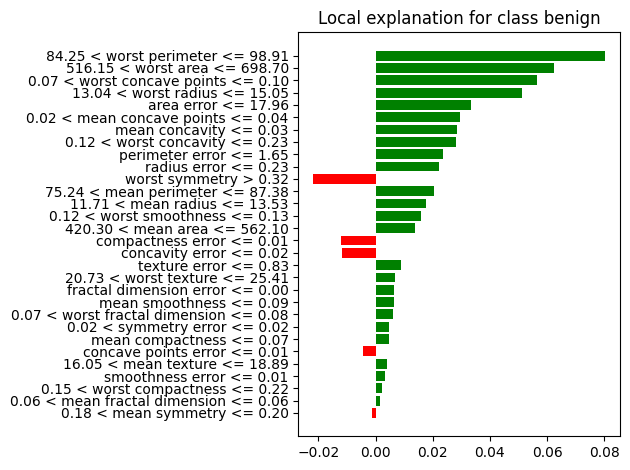

Correct:  Benign
Classification:  [1]
{'mean radius': 8.571, 'mean texture': 13.1, 'mean perimeter': 54.53, 'mean area': 221.3, 'mean smoothness': 0.1036, 'mean compactness': 0.07632, 'mean concavity': 0.02565, 'mean concave points': 0.0151, 'mean symmetry': 0.1678, 'mean fractal dimension': 0.07126, 'radius error': 0.1267, 'texture error': 0.6793, 'perimeter error': 1.069, 'area error': 7.254, 'smoothness error': 0.007897, 'compactness error': 0.01762, 'concavity error': 0.01801, 'concave points error': 0.00732, 'symmetry error': 0.01592, 'fractal dimension error': 0.003925, 'worst radius': 9.473, 'worst texture': 18.45, 'worst perimeter': 63.3, 'worst area': 275.6, 'worst smoothness': 0.1641, 'worst compactness': 0.2235, 'worst concavity': 0.1754, 'worst concave points': 0.08512, 'worst symmetry': 0.2983, 'worst fractal dimension': 0.1049}


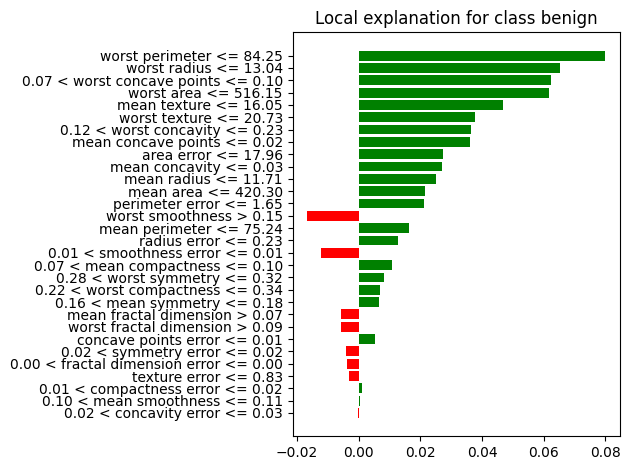

Correct:  Benign
Classification:  [1]
{'mean radius': 8.597, 'mean texture': 18.6, 'mean perimeter': 54.09, 'mean area': 221.2, 'mean smoothness': 0.1074, 'mean compactness': 0.05847, 'mean concavity': 0.0, 'mean concave points': 0.0, 'mean symmetry': 0.2163, 'mean fractal dimension': 0.07359, 'radius error': 0.3368, 'texture error': 2.777, 'perimeter error': 2.222, 'area error': 17.81, 'smoothness error': 0.02075, 'compactness error': 0.01403, 'concavity error': 0.0, 'concave points error': 0.0, 'symmetry error': 0.06146, 'fractal dimension error': 0.00682, 'worst radius': 8.952, 'worst texture': 22.44, 'worst perimeter': 56.65, 'worst area': 240.1, 'worst smoothness': 0.1347, 'worst compactness': 0.07767, 'worst concavity': 0.0, 'worst concave points': 0.0, 'worst symmetry': 0.3142, 'worst fractal dimension': 0.08116}


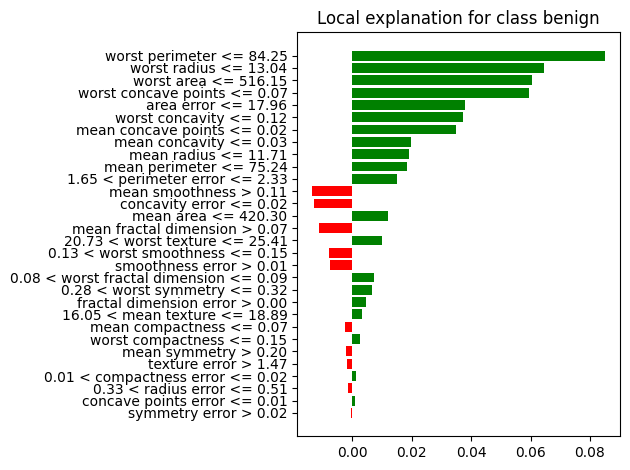

Correct:  Benign
Classification:  [1]
{'mean radius': 12.05, 'mean texture': 22.72, 'mean perimeter': 78.75, 'mean area': 447.8, 'mean smoothness': 0.06935, 'mean compactness': 0.1073, 'mean concavity': 0.07943, 'mean concave points': 0.02978, 'mean symmetry': 0.1203, 'mean fractal dimension': 0.06659, 'radius error': 0.1194, 'texture error': 1.434, 'perimeter error': 1.778, 'area error': 9.549, 'smoothness error': 0.005042, 'compactness error': 0.0456, 'concavity error': 0.04305, 'concave points error': 0.01667, 'symmetry error': 0.0247, 'fractal dimension error': 0.007358, 'worst radius': 12.57, 'worst texture': 28.71, 'worst perimeter': 87.36, 'worst area': 488.4, 'worst smoothness': 0.08799, 'worst compactness': 0.3214, 'worst concavity': 0.2912, 'worst concave points': 0.1092, 'worst symmetry': 0.2191, 'worst fractal dimension': 0.09349}


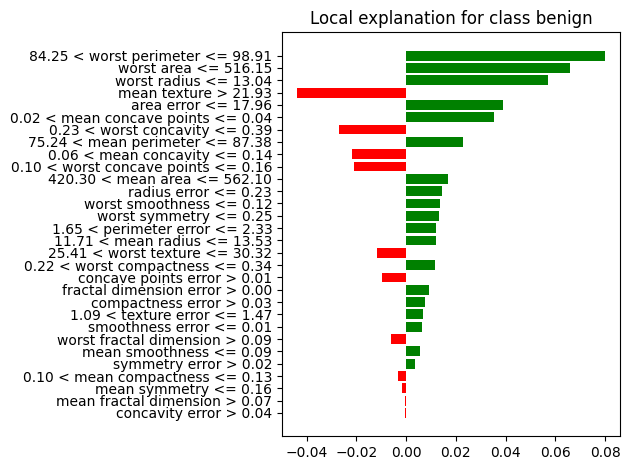

Correct:  Benign
Classification:  [1]
{'mean radius': 13.66, 'mean texture': 19.13, 'mean perimeter': 89.46, 'mean area': 575.3, 'mean smoothness': 0.09057, 'mean compactness': 0.1147, 'mean concavity': 0.09657, 'mean concave points': 0.04812, 'mean symmetry': 0.1848, 'mean fractal dimension': 0.06181, 'radius error': 0.2244, 'texture error': 0.895, 'perimeter error': 1.804, 'area error': 19.36, 'smoothness error': 0.00398, 'compactness error': 0.02809, 'concavity error': 0.03669, 'concave points error': 0.01274, 'symmetry error': 0.01581, 'fractal dimension error': 0.003956, 'worst radius': 15.14, 'worst texture': 25.5, 'worst perimeter': 101.4, 'worst area': 708.8, 'worst smoothness': 0.1147, 'worst compactness': 0.3167, 'worst concavity': 0.366, 'worst concave points': 0.1407, 'worst symmetry': 0.2744, 'worst fractal dimension': 0.08839}


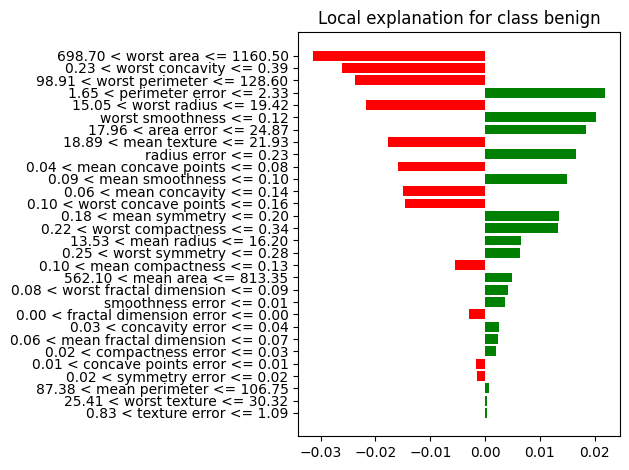

Correct:  Malignant
Classification:  [0]
{'mean radius': 13.11, 'mean texture': 15.56, 'mean perimeter': 87.21, 'mean area': 530.2, 'mean smoothness': 0.1398, 'mean compactness': 0.1765, 'mean concavity': 0.2071, 'mean concave points': 0.09601, 'mean symmetry': 0.1925, 'mean fractal dimension': 0.07692, 'radius error': 0.3908, 'texture error': 0.9238, 'perimeter error': 2.41, 'area error': 34.66, 'smoothness error': 0.007162, 'compactness error': 0.02912, 'concavity error': 0.05473, 'concave points error': 0.01388, 'symmetry error': 0.01547, 'fractal dimension error': 0.007098, 'worst radius': 16.31, 'worst texture': 22.4, 'worst perimeter': 106.4, 'worst area': 827.2, 'worst smoothness': 0.1862, 'worst compactness': 0.4099, 'worst concavity': 0.6376, 'worst concave points': 0.1986, 'worst symmetry': 0.3147, 'worst fractal dimension': 0.1405}


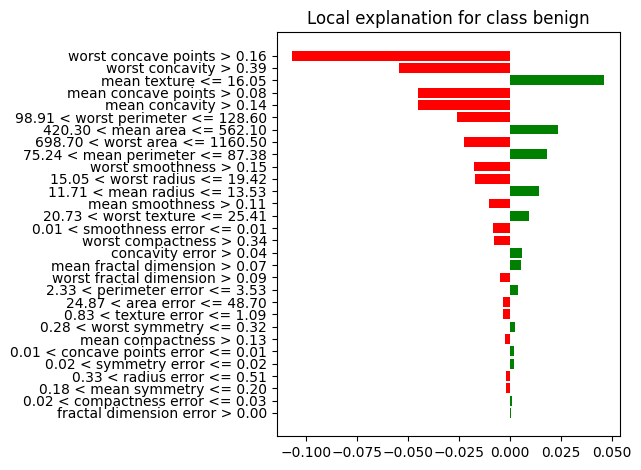

Correct:  Benign
Classification:  [1]
{'mean radius': 8.734, 'mean texture': 16.84, 'mean perimeter': 55.27, 'mean area': 234.3, 'mean smoothness': 0.1039, 'mean compactness': 0.07428, 'mean concavity': 0.0, 'mean concave points': 0.0, 'mean symmetry': 0.1985, 'mean fractal dimension': 0.07098, 'radius error': 0.5169, 'texture error': 2.079, 'perimeter error': 3.167, 'area error': 28.85, 'smoothness error': 0.01582, 'compactness error': 0.01966, 'concavity error': 0.0, 'concave points error': 0.0, 'symmetry error': 0.01865, 'fractal dimension error': 0.006736, 'worst radius': 10.17, 'worst texture': 22.8, 'worst perimeter': 64.01, 'worst area': 317.0, 'worst smoothness': 0.146, 'worst compactness': 0.131, 'worst concavity': 0.0, 'worst concave points': 0.0, 'worst symmetry': 0.2445, 'worst fractal dimension': 0.08865}


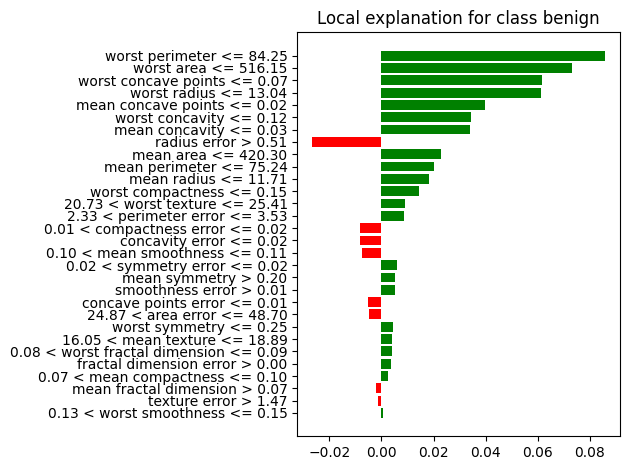

Correct:  Benign
Classification:  [1]
{'mean radius': 10.66, 'mean texture': 15.15, 'mean perimeter': 67.49, 'mean area': 349.6, 'mean smoothness': 0.08792, 'mean compactness': 0.04302, 'mean concavity': 0.0, 'mean concave points': 0.0, 'mean symmetry': 0.1928, 'mean fractal dimension': 0.05975, 'radius error': 0.3309, 'texture error': 1.925, 'perimeter error': 2.155, 'area error': 21.98, 'smoothness error': 0.008713, 'compactness error': 0.01017, 'concavity error': 0.0, 'concave points error': 0.0, 'symmetry error': 0.03265, 'fractal dimension error': 0.001002, 'worst radius': 11.54, 'worst texture': 19.2, 'worst perimeter': 73.2, 'worst area': 408.3, 'worst smoothness': 0.1076, 'worst compactness': 0.06791, 'worst concavity': 0.0, 'worst concave points': 0.0, 'worst symmetry': 0.271, 'worst fractal dimension': 0.06164}


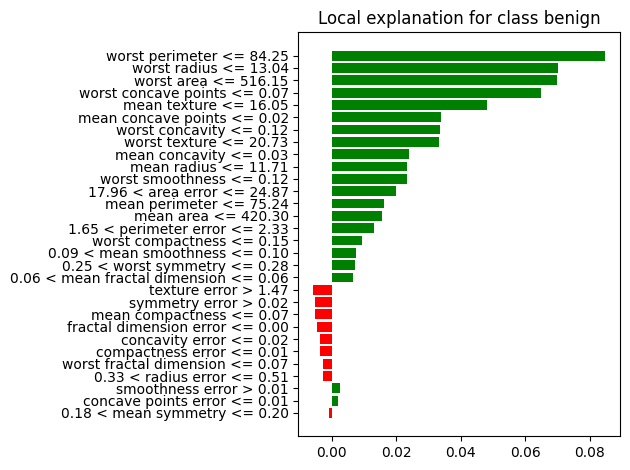

Correct:  Benign
Classification:  [1]
{'mean radius': 13.37, 'mean texture': 16.39, 'mean perimeter': 86.1, 'mean area': 553.5, 'mean smoothness': 0.07115, 'mean compactness': 0.07325, 'mean concavity': 0.08092, 'mean concave points': 0.028, 'mean symmetry': 0.1422, 'mean fractal dimension': 0.05823, 'radius error': 0.1639, 'texture error': 1.14, 'perimeter error': 1.223, 'area error': 14.66, 'smoothness error': 0.005919, 'compactness error': 0.0327, 'concavity error': 0.04957, 'concave points error': 0.01038, 'symmetry error': 0.01208, 'fractal dimension error': 0.004076, 'worst radius': 14.26, 'worst texture': 22.75, 'worst perimeter': 91.99, 'worst area': 632.1, 'worst smoothness': 0.1025, 'worst compactness': 0.2531, 'worst concavity': 0.3308, 'worst concave points': 0.08978, 'worst symmetry': 0.2048, 'worst fractal dimension': 0.07628}


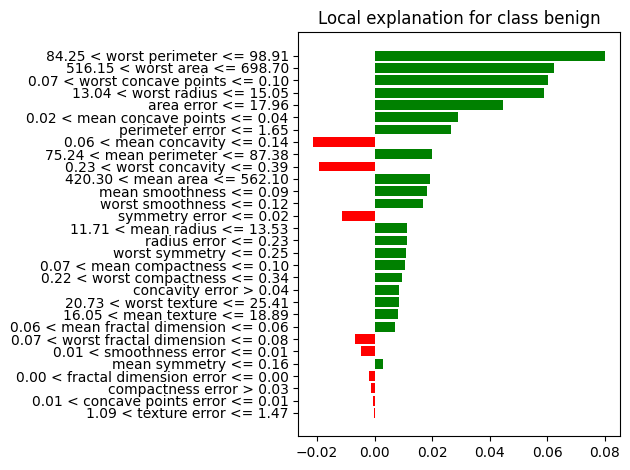

Correct:  Malignant
Classification:  [0]
{'mean radius': 18.22, 'mean texture': 18.87, 'mean perimeter': 118.7, 'mean area': 1027.0, 'mean smoothness': 0.09746, 'mean compactness': 0.1117, 'mean concavity': 0.113, 'mean concave points': 0.0795, 'mean symmetry': 0.1807, 'mean fractal dimension': 0.05664, 'radius error': 0.4041, 'texture error': 0.5503, 'perimeter error': 2.547, 'area error': 48.9, 'smoothness error': 0.004821, 'compactness error': 0.01659, 'concavity error': 0.02408, 'concave points error': 0.01143, 'symmetry error': 0.01275, 'fractal dimension error': 0.002451, 'worst radius': 21.84, 'worst texture': 25.0, 'worst perimeter': 140.9, 'worst area': 1485.0, 'worst smoothness': 0.1434, 'worst compactness': 0.2763, 'worst concavity': 0.3853, 'worst concave points': 0.1776, 'worst symmetry': 0.2812, 'worst fractal dimension': 0.08198}


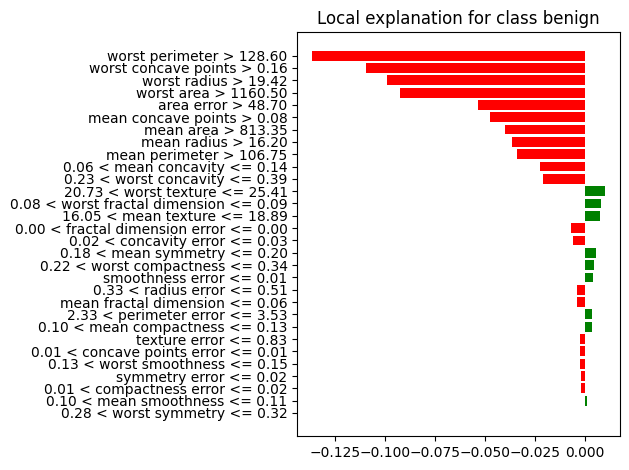

In [25]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data= X_train,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    mode='classification'
)

for i in range(20):
    print('Correct: ', 'Benign' if y_test[i] else 'Malignant')
    print ('Classification: ', forest_clf.predict([X_test[i]]))
    print(dict(zip(data['feature_names'], X_test[i])))
    
    explanation = explainer.explain_instance(
        data_row=X_test[i],
        predict_fn=forest_clf.predict_proba,
        num_features=30
    )

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()